# Titanic_Project

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

#### Data Overview

In [363]:
# identify the number of survivors
df = pd.read_csv('titanic data\\train.csv')
df['Survived'].sum()

342

In [364]:
# identify the numbe of passengers survived under 18
df = pd.read_csv('titanic data\\train.csv')
df[df['Age'] < 18]['Survived'].sum()

61

In [365]:
# identify the number of male and female passengers
df = pd.read_csv('titanic data\\train.csv')
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [366]:
# import file from excel named train
df = pd.read_csv('titanic data\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
# remove the passengerId column
df = df.drop(['PassengerId'], axis=1)

## Missing values

In [368]:
# display all the columns with mising values
df[df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [369]:
# drop the cabin column
df = df.drop(['Cabin'], axis=1)

In [370]:
# display all the missing values
df[df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


## Encoding

In [371]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [372]:
# unique values for the "Sex" column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [373]:
# encode the "Sex" column with 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [374]:
# unique values for the "Embarked" column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [375]:
# encode the "Embarked" column with 0, 1, 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [376]:
# impute the missing values in embarked with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [377]:
# impute the missing values with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [378]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked    float64
dtype: object

#### Graphs representing data

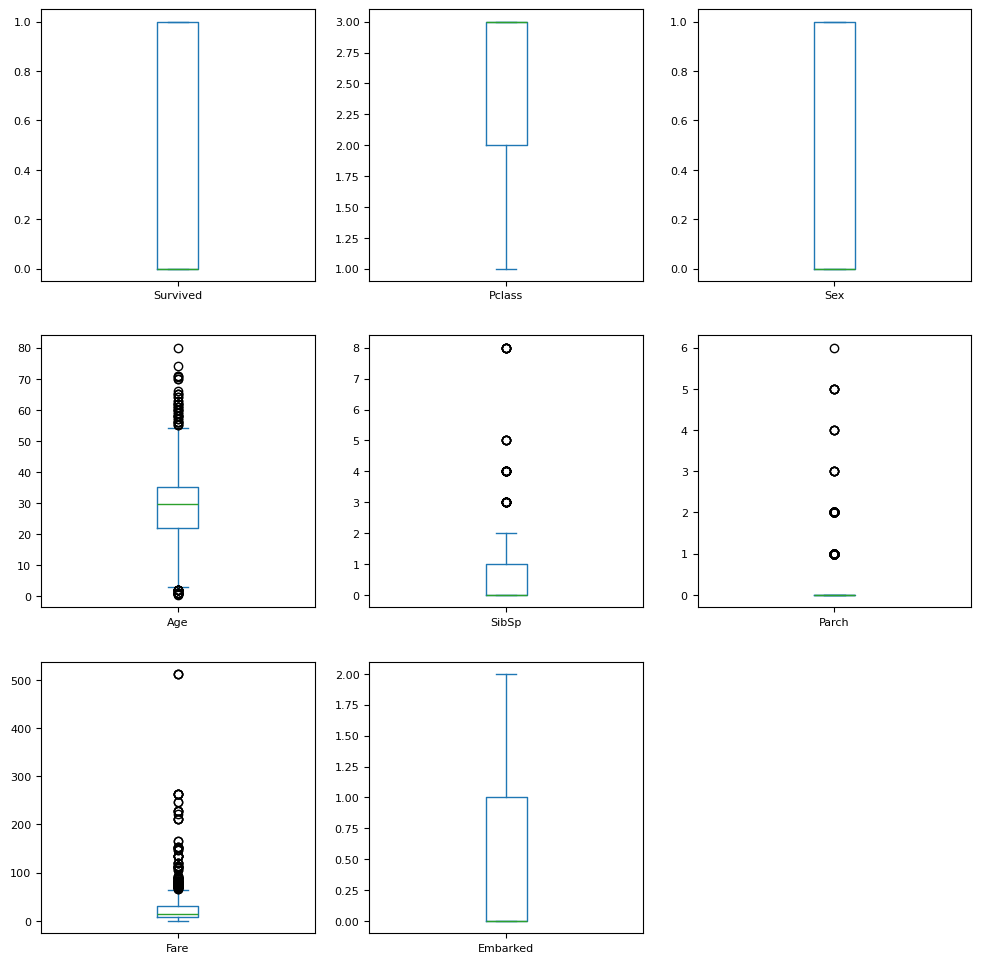

In [379]:
# draw a box plot of all numerical variables with outliers with labels
figsize = (12,12)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=(12,12))
plt.show()

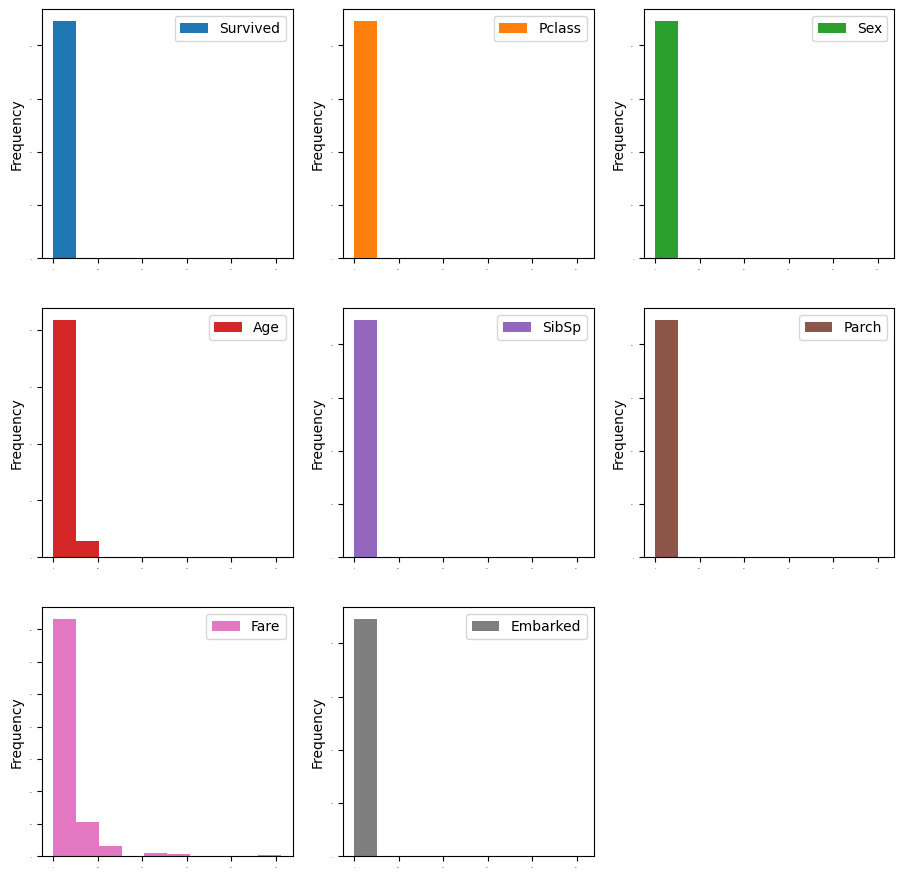

In [380]:
# draw a histogram of all numerical variables with labels
figsize = (11,11)
df.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=1, figsize=figsize)
plt.show()


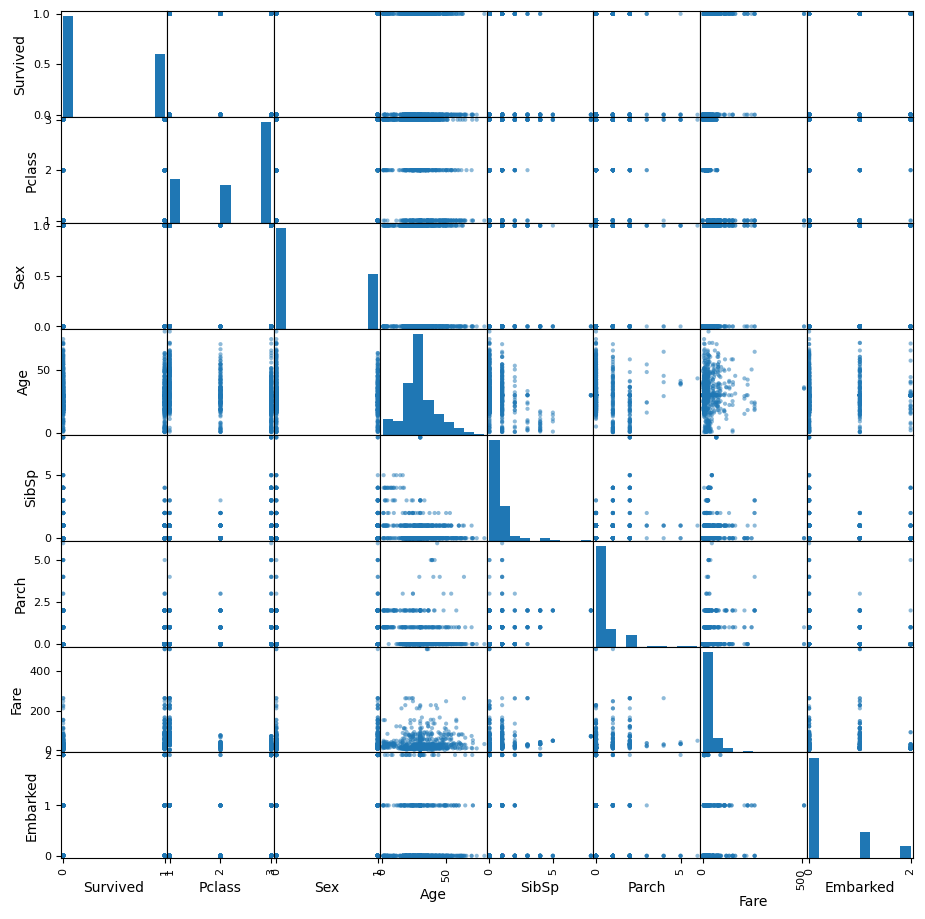

In [381]:
# draw a scatter matrix of all numerical variables
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(11,11))
plt.show()

## Data Normalization (Scaling)

In [382]:
# identify the max age 
df['Age'].max()

80.0

In [383]:
# indentify the max fare
df['Fare'].max()

512.3292

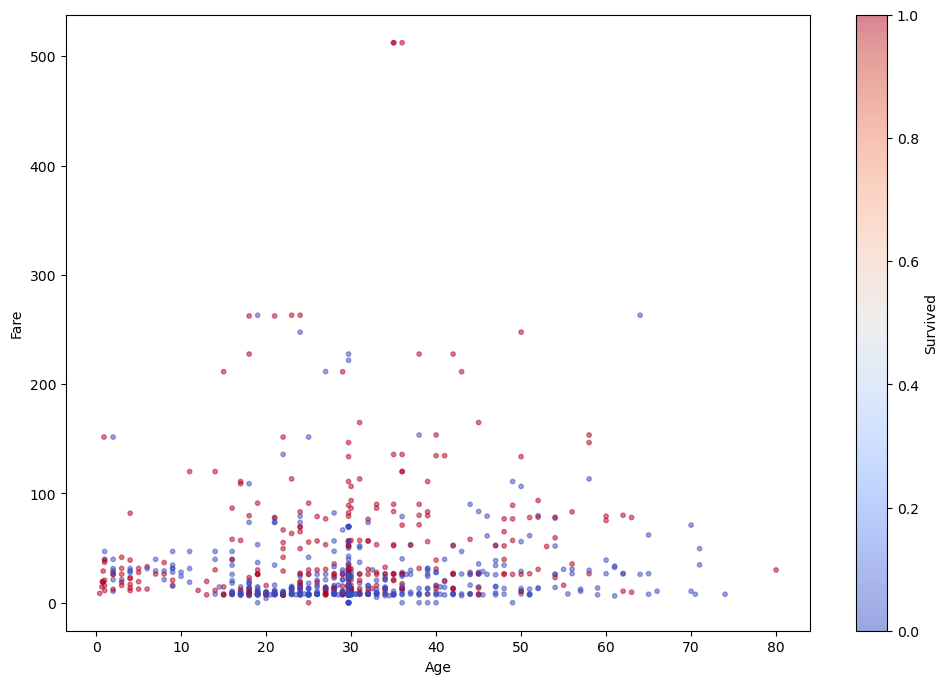

In [384]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))

plt.show()

In [385]:
# remove the row with an outlier above 500 in fare
df = df[df['Fare'] < 500]

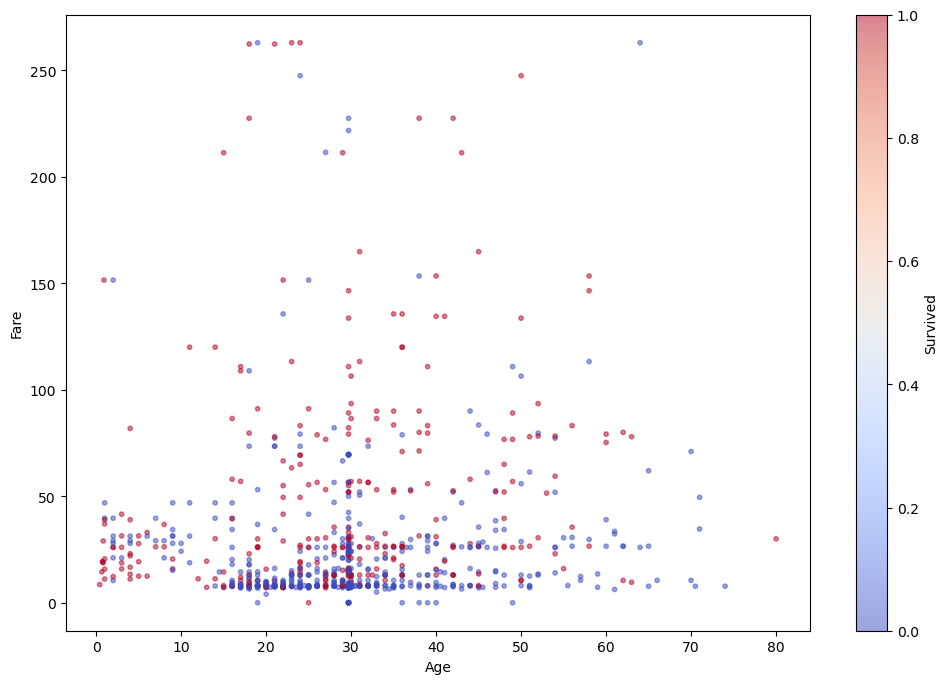

In [386]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))

plt.show()

In [387]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked    float64
dtype: object

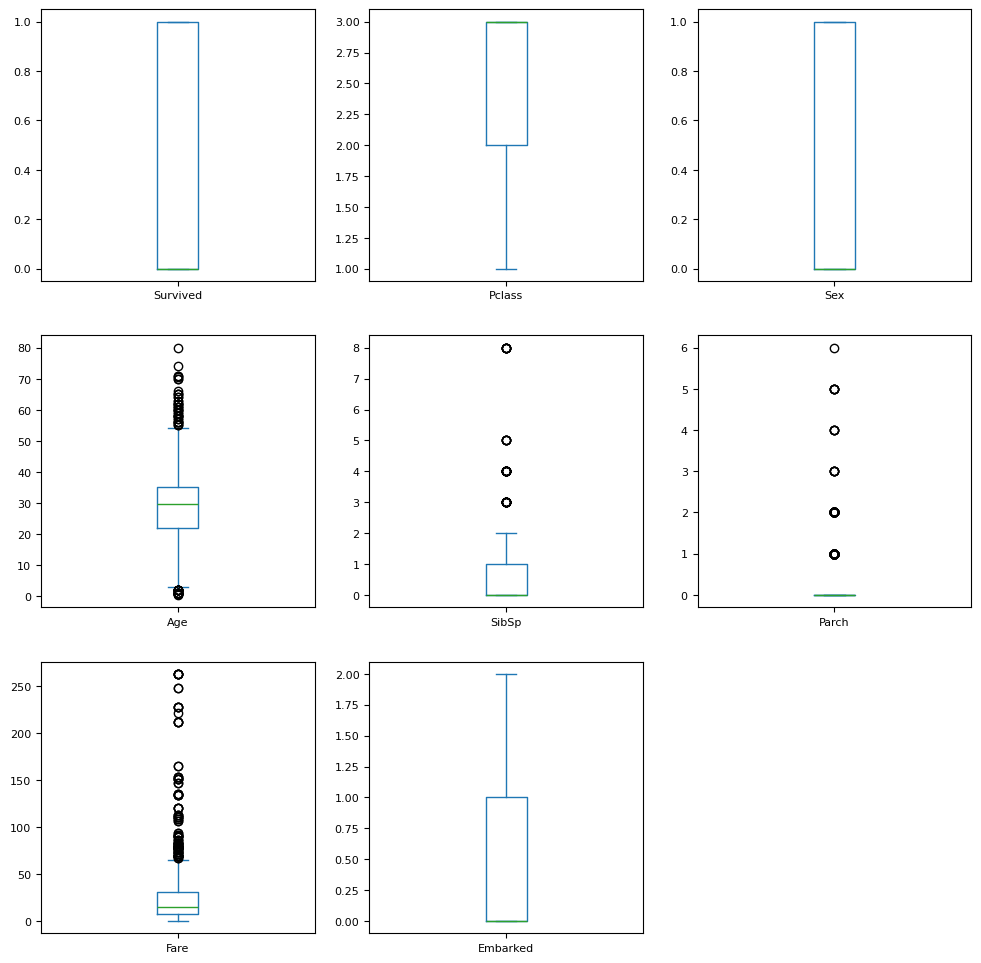

In [388]:
# draw a box plot of all numerical variables with outliers with labels
figsize = (12,12)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=(12,12))
plt.show()

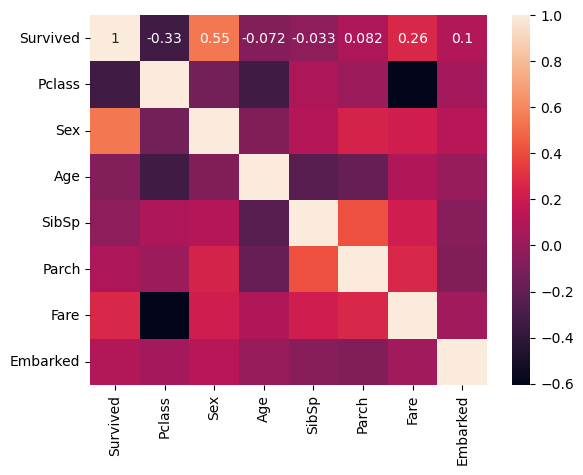

In [389]:
# remove non-numeric columns
df = df.select_dtypes(include=[np.number]) # only include numeric columns


# show correlation
df.corr()
# show heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [390]:
# display all the columns
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Logistic Regression

#### Training

In [391]:
# use logistic regression
from sklearn.linear_model import LogisticRegression

# use train test split
from sklearn.model_selection import train_test_split

# use confusion matrix
from sklearn.metrics import confusion_matrix

# use classification report
from sklearn.metrics import classification_report

In [392]:
# let x= all the numerical columns except survived
x = df.drop(['Survived'], axis=1)
# y=Survived
y = df['Survived']

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [393]:
# use logistic regression
lr = LogisticRegression()

# fit the model
lr.fit(x_train, y_train)

c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Testing

In [394]:
predictions = lr.predict(x_test) 

cm = confusion_matrix(y_test, predictions) 
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predictions)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[86 18]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       104
           1       0.77      0.80      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



## Saving the model

In [395]:
# save the model
import pickle

with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

## Tesing Data

In [396]:
# import test.csv file 
test = pd.read_csv('titanic data\\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.info()

In [ ]:
# encode the sex column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# encode the embarked column with 0,1,2
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
test.info()

In [ ]:
test.isnull().sum()

In [ ]:
# remove non numeric columns
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# drop the PassengerId column
test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
test.isnull().sum()

In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].mean()) # fill with the mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # fill with the mean

In [ ]:
# load the trained model
import pickle
with open('titanic_model.pkl', 'rb') as f:
    lr = pickle.load(f)

# predict the test data
y_pred = lr.predict(test)

In [ ]:
y_pred

In [ ]:
# create a csv file with exactly 418 entries plus a hearder row (PassenerId, Survived)
# use y_pred to fill in the Survived column

submission = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': y_pred}) # create the dataframe

submission.to_csv('submission.csv', index=False, header=True) # save the csv file

In [ ]:
submission.head()